In [2]:
import numpy as np
from matplotlib import pyplot as plt
from neural_net import neural_net # My neural net
from IPython import embed
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

### Make the training set

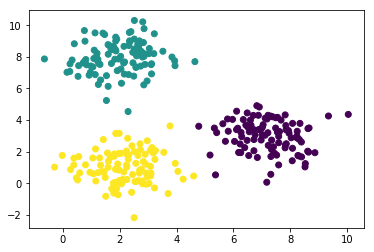

In [4]:
A1 = 7 + np.random.randn(100)
A2 = 3 + np.random.randn(100)
A = np.matrix([list(a) + [1, 0, 0] for a in zip(A1, A2)])

B1 = 2 + np.random.randn(100)
B2 = 8 + np.random.randn(100)
B = np.matrix([list(b) + [0, 1, 0] for b in zip(B1, B2)])

C1 = 2 + np.random.randn(100)
C2 = 1 + np.random.randn(100)
C = np.matrix([list(c) + [0, 0, 1] for c in zip(C1, C2)])

D = np.concatenate((A, B, C))
np.random.shuffle(D)
X = D[:, :2] 
y = D[:, 2:]
z = y * np.matrix([[0],[1],[2]]) # Categorical form of targets

fig, ax = plt.subplots()
ax.scatter(X[:, 0].A1, X[:, 1].A1, c = z.A1)
#ax.axis('off')
plt.show()

### Preprocess data

In [5]:
# Normalize input
for i in range(2):
    mu = np.mean(X[:, i])
    sigma = np.std(X[:, i])
    X[:, i] = (X[:, i] - mu)/sigma

### Initialize and train the network

In [6]:
N = neural_net([2, 4, 4, 3])

In [7]:
costs = []
for i in range(250):
    N.train(X, y)
    costs.append(N.cost(X, y))

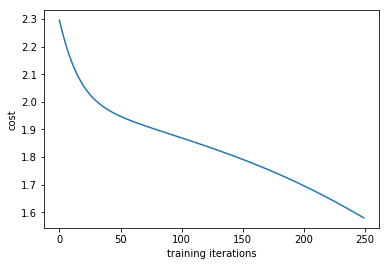

In [8]:
plt.plot(costs)
plt.xlabel('training iterations')
plt.ylabel('cost')
plt.show()

### Plot decision regions

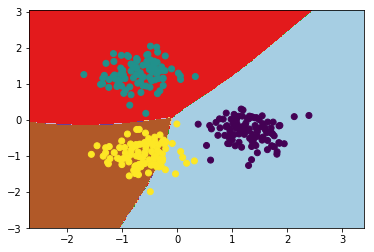

In [10]:
# create a mesh to plot in
# This only works if the input vectors are 2-dimensional and the network is a classifier
step_size = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_coords = np.arange(x_min, x_max, step_size)
y_coords = np.arange(y_min, y_max, step_size)
# xx is x_coords repeated len(y_coords) times, 
# while yy is len(x_coords) copies of the first element of y_coords, followed by len(x_coords) copies of the second element, etc.
xx, yy = np.meshgrid(x_coords, y_coords)
coords = np.c_[xx.ravel(), yy.ravel()] # creates a (len(xcoords)*len(ycoords))x2 - dimensional array whose rows are the coordinates of the window.

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = N.predict(coords)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
#ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0].A1, X[:, 1].A1, c=z.A1)#, cmap=plt.cm.Paired)

plt.show() # Really ugly colors, but I don't know/care how to change that.